## DSC180B Group11 Project Report

 #### This notebook serves to demonstrate different visual plots for exploratory data analysis(EDA) and dataset validation

In [1]:
# Necessary imports

import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
from pprint import pprint
from collections import Counter

sys.path.insert(0, '../src')
from load_data import path_generator, load_jet_features, load_num_sv
from mass_distribution import mass_distribution
from sv_mass_distribution import sv_mass_distribution
from jet_mass_validation import jet_mass_validation
from jet_type_validation import jet_type_validation
from pt_mass_relationship import pt_mass_relationship

%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

----

### Generating filepaths to sample jet data 

For performing EDA, we will utilize just certain number of QCD and Signal jets for memory and runtime optimization. Source of these files are located either in `train_mass_qcd` for QCD jets or `train_mass_hbb` for Signal jets. Those directories are then separated into numbers of subdirectories. On average, the size of `.root` files for QCD data is far smaller than those for Signal data; this is possibly due to QCD data existing in smaller partitioned files than Signal data. According to our calculation, approximately $55$ `.root` files of QCD jets are as big as $8$ `.root` files of Signal jets in terms of file(byte) size. Hence by default, `path_generator()` generates $55$ random QCD `.root` files and $8$ random Signal `.root` files.

In [4]:
qcd_eda_sets = path_generator('qcd', eda=True)
signal_eda_sets = path_generator('signal', eda=True)
print(f'Loaded {len(qcd_eda_sets)} QCD files and \
{len(signal_eda_sets)} Signal files')

Loaded 55 QCD files and 8 Signal files


----

### Data Validation\#1 -- Jet types

Before exploring our data, we need to ensure each jet belongs to one and only one jet type. Due to its vareity, we won't filter out any QCD jet types but for Signal jets, we will explore only those jets with type `H_bb`, `H_cc`, and `H_qq`. 

In [5]:
# Load all jet features of QCD jets

df_qcd = load_jet_features(qcd_eda_sets)
display(df_qcd.head())
print('\n', f'{df_qcd.shape[0]} randomly generated QCD jet samples')

,fj_pt,fj_eta,fj_phi,fj_mass,fj_msoftdrop,fj_deepTagMD_H4qvsQCD,fj_deepTag_HvsQCD,fj_PN_H4qvsQCD,fj_PN_XbbvsQCD,fj_genjetmsd,...,fj_genW_decay,fj_genWstar_decay,fj_evt_met_covxx,fj_evt_met_covxy,fj_evt_met_covyy,fj_evt_met_dphi,fj_evt_met_pt,fj_evt_met_sig,fj_evt_pupmet_pt,fj_evt_pupmet_dphi
0,505.75,-0.370178,0.858643,104.625,11.445312,-1000.0,-1000.0,0.002616,0.000102,27.390625,...,-99.0,-99.0,1492.0,764.0000,1168.0,2.824445,14.696939,0.107788,35.535828,-2.317627
1,500.75,-1.355469,-2.433105,119.000,97.375000,-1000.0,-1000.0,0.007961,0.000982,104.812500,...,-99.0,-99.0,1492.0,764.0000,1168.0,-0.166992,14.696939,0.107788,35.535828,0.974121
2,565.00,-0.317871,2.036133,75.000,2.482422,-1000.0,-1000.0,0.000680,0.000695,6.160156,...,-99.0,-99.0,1044.0,-268.0000,1984.0,2.450422,37.301929,0.840332,26.507681,2.886457
3,477.50,0.699829,-1.424561,95.875,6.343750,-1000.0,-1000.0,0.000328,0.011421,1.346680,...,-99.0,-99.0,1044.0,-268.0000,1984.0,-0.372070,37.301929,0.840332,26.507681,0.063965
4,708.50,-0.972046,-0.574341,139.125,57.937500,-1000.0,-1000.0,0.000786,0.018928,65.187500,...,-99.0,-99.0,462.0,-9.4375,480.0,2.697388,7.942967,0.130493,15.642176,-2.856305



 413107 randomly generated QCD jet samples


In [6]:
# QCD jet type validation
df_qcd_labels, qcd_counts = jet_type_validation(df_qcd, 'qcd')

display(qcd_counts)

Each jet corresponds to exactly one type: True


,Count
fj_isQCDothers,251560
fj_isQCDlep,90060
fj_isQCDcc,28886
fj_isQCDc,28496
fj_isQCDb,7128
fj_isQCDbb,6977


In [7]:
# Load all jet features of Signal jets

df_signal = load_jet_features(signal_eda_sets)
display(df_signal.head())
print('\n', f'{df_signal.shape[0]} randomly generated Signal jet samples')

,fj_pt,fj_eta,fj_phi,fj_mass,fj_msoftdrop,fj_deepTagMD_H4qvsQCD,fj_deepTag_HvsQCD,fj_PN_H4qvsQCD,fj_PN_XbbvsQCD,fj_genjetmsd,...,fj_genW_decay,fj_genWstar_decay,fj_evt_met_covxx,fj_evt_met_covxy,fj_evt_met_covyy,fj_evt_met_dphi,fj_evt_met_pt,fj_evt_met_sig,fj_evt_pupmet_pt,fj_evt_pupmet_dphi
0,1453.0,-0.474609,2.500488,203.500,158.250000,-1000.0,-1000.0,0.000022,0.002287,163.000000,...,-99.0,-99.0,5248.0,-3624.00,3888.0,-0.825684,25.359968,0.396484,12.420828,-1.291016
1,1370.0,0.313171,-0.690918,227.125,176.375000,-1000.0,-1000.0,0.000009,0.004747,160.000000,...,-99.0,-99.0,5248.0,-3624.00,3888.0,2.365723,25.359968,0.396484,12.420828,1.900391
2,1606.0,0.219757,1.572998,211.875,174.000000,-1000.0,-1000.0,0.000018,0.057802,160.000000,...,-99.0,-99.0,1022.0,-33.75,1088.0,-2.980713,239.817047,52.437500,287.455688,-3.076416
3,1362.0,0.445923,-1.615234,197.000,11.765625,-1000.0,-1000.0,0.054127,0.179098,2.398438,...,-99.0,-99.0,1022.0,-33.75,1088.0,0.207520,239.817047,52.437500,287.455688,0.111816
4,1457.0,-0.183411,-2.663574,234.375,151.250000,-1000.0,-1000.0,0.000317,0.999987,159.750000,...,-99.0,-99.0,7248.0,3304.00,2272.0,-3.109723,167.718735,3.253906,180.107941,3.085693



 507211 randomly generated Signal jet samples


In [8]:
# Signal jet type validation
df_signal_labels, signal_counts = jet_type_validation(df_signal, 'signal')

display(signal_counts)

After dropping uninterested jet types: 478155 rows 

After dropping jets with more than one type associated: 478115 rows 

Each jet corresponds to exactly one type: True


,Count
fj_H_cc,160087
fj_H_bb,159650
fj_H_qq,158378


-----

### Data Validation\#2 -- Jet mass

There are not only multiple jet types, but also multiple jet mass variable in our datasets including `fj_genjetmsd`, `fj_genjetmass`, `fj_msoftdrop`, `fj_genRes_mass`. However all their measures differ as they're computed using different approaches. For example, `fj_msoftdrop` is a jet sub-constructure output from soft drop declustering, which is a technique that recursively removes soft wide-angle radiation from a jet using parameters like soft threshold($z_{cut}$) and angular exponent(β). On the other hand, `fj_genjetmsd`, which is our target variable, is a generator-level soft drop mass measured based on generator-level particles, or existing particles before any detector interactions. Because of this, **incorporating `fj_msoftdrop` in our model training process won't bias overall learning of the model.** So now, we'll check if `fj_msoftdrop` is an effective feature for predicting generator-level soft drop mass(`fj_genjetmsd`) of a jet by computing coefficient of correlation($R$) and sketching scatterplot. Unlike reconstructured soft drop mass, `fj_genjetmass` and `fj_genRes_mass` are mass variables measured at the collision-generator level. In other words, these two mass variables are the closest to the **true** jet mass. Therefore, they cannot be employed for model training process.

In [9]:
# Filtering using the validation results

signal_idx = df_signal_labels.index.tolist()
df_signal = df_signal.filter(items=signal_idx, axis=0)

In [10]:
# We only need the two mass variables
# and column for jet labels

mass_attrs = ['fj_msoftdrop', 'fj_genjetmsd']
df_qcd_mass = df_qcd[mass_attrs]
df_qcd_mass = df_qcd_mass.assign(jet_type='QCD')

df_signal_mass = df_signal[mass_attrs]
df_signal_mass = df_signal_mass.assign(jet_type='Signal')

df_mass = pd.concat([df_qcd_mass, df_signal_mass], axis=0).reset_index(drop=True)
display(df_mass.head())

,fj_msoftdrop,fj_genjetmsd,jet_type
0,11.445312,27.390625,QCD
1,97.375000,104.812500,QCD
2,2.482422,6.160156,QCD
3,6.343750,1.346680,QCD
4,57.937500,65.187500,QCD


Correlation coefficient between `fj_msoftdrop` and `fj_genjetmsd` is 0.9554


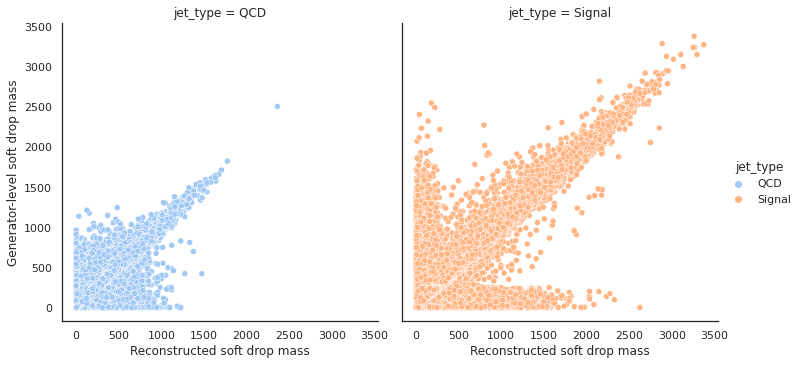

In [11]:
# Scatterplot with `fj_msoftdrop` on x-axis and
# `fj_genjetmsd` on y-axis

scatterplot = jet_mass_validation(df_mass)

> As expected from computed $R$ score, there exists strong positive linear relationship between the two jet mass attributes for both types of jet. Our exploratory analysis indicates that `fj_msoftdrop` will work greatly in a model training process and thus, improve the overall regression performance of the model. We will definitely incorporate `fj_msoftdrop` in our model training process.

-----

### Distribution of Jet mass per jet type

Our regression model is capable of predicting the mass, or weight, of particle jets based on the information learned from features relevant to jet and other existing components in the jet. These jets can be largely categorized into two distinct groups: `QCD` and `Signal`. Some signal jets are known to be relatively heavier than QCD jets due to the type of resulting decay products and their expected lifespan, which allow longer-living particles to be heavier.

In [12]:
# Create temporary attr `Type` to differentiate QCD jets from signal jets
# Then concatenate QCD dataset to signal dataset

df_qcd['Type'] = 'QCD'
df_signal['Type'] = 'Signal'

df_qcd_and_signal = pd.concat([df_qcd, df_signal], axis=0)
display(df_qcd_and_signal.head())

,fj_pt,fj_eta,fj_phi,fj_mass,fj_msoftdrop,fj_deepTagMD_H4qvsQCD,fj_deepTag_HvsQCD,fj_PN_H4qvsQCD,fj_PN_XbbvsQCD,fj_genjetmsd,...,fj_genWstar_decay,fj_evt_met_covxx,fj_evt_met_covxy,fj_evt_met_covyy,fj_evt_met_dphi,fj_evt_met_pt,fj_evt_met_sig,fj_evt_pupmet_pt,fj_evt_pupmet_dphi,Type
0,505.75,-0.370178,0.858643,104.625,11.445312,-1000.0,-1000.0,0.002616,0.000102,27.390625,...,-99.0,1492.0,764.0000,1168.0,2.824445,14.696939,0.107788,35.535828,-2.317627,QCD
1,500.75,-1.355469,-2.433105,119.000,97.375000,-1000.0,-1000.0,0.007961,0.000982,104.812500,...,-99.0,1492.0,764.0000,1168.0,-0.166992,14.696939,0.107788,35.535828,0.974121,QCD
2,565.00,-0.317871,2.036133,75.000,2.482422,-1000.0,-1000.0,0.000680,0.000695,6.160156,...,-99.0,1044.0,-268.0000,1984.0,2.450422,37.301929,0.840332,26.507681,2.886457,QCD
3,477.50,0.699829,-1.424561,95.875,6.343750,-1000.0,-1000.0,0.000328,0.011421,1.346680,...,-99.0,1044.0,-268.0000,1984.0,-0.372070,37.301929,0.840332,26.507681,0.063965,QCD
4,708.50,-0.972046,-0.574341,139.125,57.937500,-1000.0,-1000.0,0.000786,0.018928,65.187500,...,-99.0,462.0,-9.4375,480.0,2.697388,7.942967,0.130493,15.642176,-2.856305,QCD


,avg_jetmass,med_jetmass
Type,,
QCD,125.438683,57.46875
Signal,179.098999,110.00000


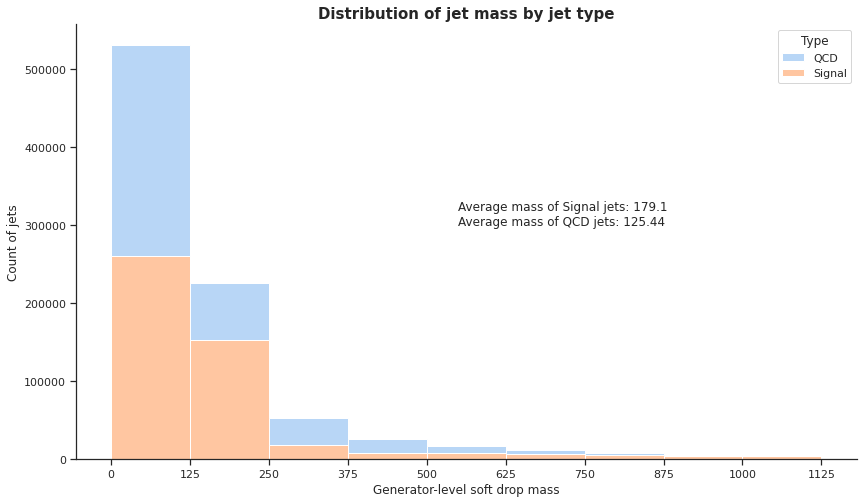

In [13]:
hist, summary = mass_distribution(df_qcd_and_signal)

display(summary)
print('\n')

> You can see that there are more QCD jets clustered in left-hand side of the plot than Signal jets, and the height of QCD jet bins eventually get shorter as the mass gets bigger. Signal jets in our dataset also have higher both average and median jet mass than QCD jets. This trend aligns with the particles in Signal jets having  relatively longer lifespan than those in QCD jets as heavier particles live longer until they decay.

------

### Relationship between number of secondary verticies recorded in a jet and its mass

When two protons collide, the collision produces particles that soon decay into other sub-particles. However, not all particles, or sub-particles, decay at the same rate; typically, heavier particles have longer lifespan than lighter particles, which allows them to travel further away from the origin collision point(AKA *primary vertex*). At some point, those heavy particles decay into sub-particles as well, at which the decay point is recorded distant from origin collision point. This distant decay point is what scientists refer as *secondary vertex*. In other words, secondary vertices are usually recorded in a jet that contains some particles heavy enough to travel distant away from origin collision point. Based on this theory, we wanted to answer: Do the jets that have more secondary vertices recorded tend to be heavier than those that have fewer secondary vertices. We will check this potential relationship by plotting boxplot and linear-regression plot(`lmplot`)

#### A. QCD jets

In [14]:
# Load attributes relevant to secondary vertices in QCD jets data

qcd_num_svs, qcd_jet_mass = load_num_sv(qcd_eda_sets)

In [15]:
# Calculate necessary statistics

avg_qcd_num_svs = np.mean(qcd_num_svs)
avg_qcd_jet_mass = np.mean(qcd_jet_mass)

med_qcd_num_svs = np.median(qcd_num_svs)
med_qcd_jet_mass = np.median(qcd_jet_mass)

# We will check the most common count of 
# secondary vertices recorded in QCD jets
qcd_num_svs_counter = Counter(qcd_num_svs)
temp = qcd_num_svs_counter.items()
qcd_num_svs_counts = sorted(temp, reverse=True, key=lambda x:x[1])

In [16]:
df_qcd_num_svs_counts = pd.DataFrame(qcd_num_svs_counts,
                                     columns=['# of SVs in a jet', 'counts'],
                                    ).set_index('# of SVs in a jet')

display(df_qcd_num_svs_counts)
print(f'Majority of QCD jets in our data has zero to only few secondary vertex\
 recorded', '\n')

,counts
# of SVs in a jet,
0,150234
1,133723
2,73314
3,32815
4,13903
5,5536
6,2190
7,1392


Majority of QCD jets in our data has zero to only few secondary vertex recorded 



In [17]:
# Construct dataframe with available information

qcd_dict = {
    '# of SVs recorded':qcd_num_svs,
    'generator-level soft drop mass':qcd_jet_mass
}

qcd_df = pd.DataFrame(qcd_dict)
display(qcd_df.head())

,# of SVs recorded,generator-level soft drop mass
0,0,27.390625
1,0,104.812500
2,0,6.160156
3,0,1.346680
4,2,65.187500


,Avg_jetmass,Median_jetmass
# of SVs recorded,,
0,88.171771,25.68750
1,119.921825,56.34375
2,153.207262,89.43750
3,185.875760,117.81250
4,211.081521,142.50000
5,234.682416,162.06250
6,263.825770,189.75000
7,282.684328,199.00000


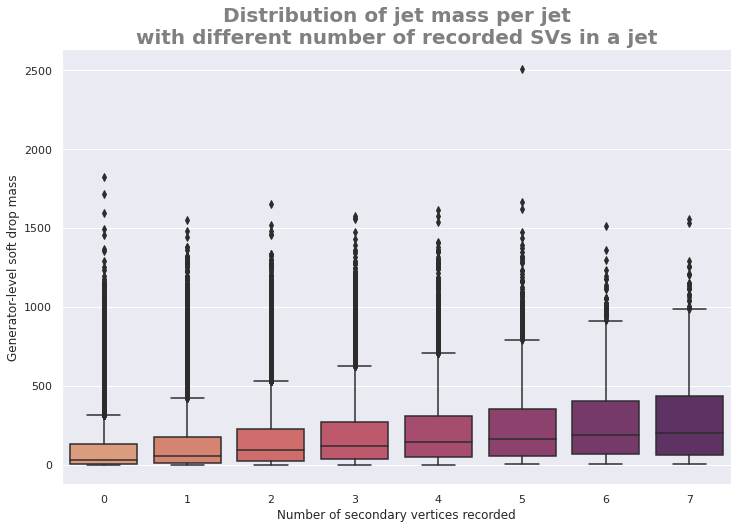

In [18]:
# Visualize distribution of jet mass
# per QCD jets with different number of SVs in them
# using boxplot

box, summary = sv_mass_distribution(qcd_df)

display(summary)
print('\n')

#### B. Signal jets

In [19]:
# Load attributes relevant to secondary vertices in Signal jets data

signal_num_svs, signal_jet_mass = load_num_sv(signal_eda_sets)

In [20]:
# Calculate necessary statistics

avg_signal_num_svs = np.mean(signal_num_svs)
avg_signal_jet_mass = np.mean(signal_jet_mass)

med_signal_num_svs = np.median(signal_num_svs)
med_signal_jet_mass = np.median(signal_jet_mass)

# We will check the most common count of 
# secondary vertices recorded in Signal jets
signal_num_svs_counter = Counter(signal_num_svs)
temp = signal_num_svs_counter.items()
signal_num_svs_counts = sorted(temp, reverse=True, key=lambda x:x[1])

In [21]:
df_signal_num_svs_counts = pd.DataFrame(signal_num_svs_counts,
                                       columns=['# of SVs in a jet', 'counts']
                                       ).set_index('# of SVs in a jet')

display(df_signal_num_svs_counts)
print(f'Unlike QCD, majority of Signal jets in our data has at least 1 secondary vertices\
 recorded')

,counts
# of SVs in a jet,
1,140467
2,114947
0,101528
3,73556
4,40141
5,19979
6,9120
7,7473


Unlike QCD, majority of Signal jets in our data has at least 1 secondary vertices recorded


In [22]:
signal_dict = {
    '# of SVs recorded':signal_num_svs,
    'generator-level soft drop mass':signal_jet_mass
}

signal_df = pd.DataFrame(signal_dict)
display(signal_df.head())

,# of SVs recorded,generator-level soft drop mass
0,0,163.000000
1,0,160.000000
2,1,160.000000
3,5,2.398438
4,0,159.750000


,Avg_jetmass,Median_jetmass
# of SVs recorded,,
0,131.941178,77.0000
1,154.194625,91.5000
2,179.619654,112.1875
3,205.087903,128.6250
4,232.077334,140.0000
5,259.030735,149.8750
6,278.746392,157.8750
7,311.238045,162.7500


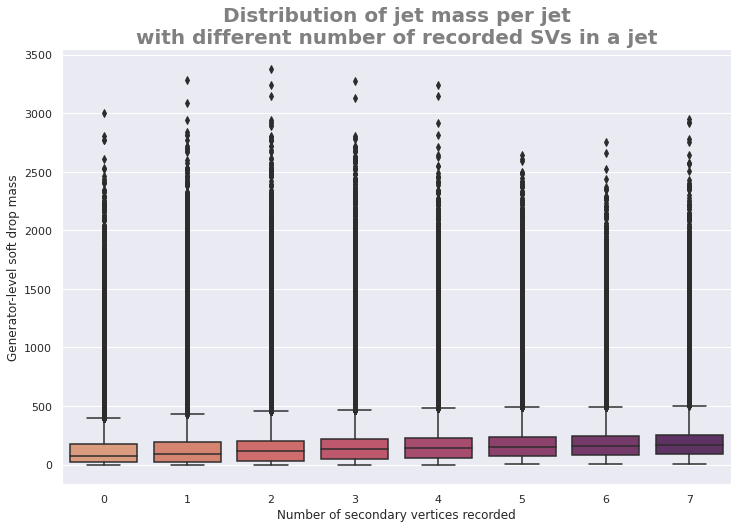

In [23]:
# Construct dataframe with available information

signal_box, summary = sv_mass_distribution(signal_df)

display(summary)
print('\n')

> As the presence of secondary vertices in a jet often indicates presence of heavy particles with longer lifespan, we expected number of secondary vertices recorded in a jet to have positive relationship with the jet mass. For instance, the two b-quarks produced from the decay of Higgs boson have relatively longer lifespan due to its heavier weight, which allow them to travel far enough from primary vertex and form secondary vertex. From above boxplots, we can see clear positive trend in jet mass for QCD jets as more secondary vertices are recorded in them. Surprisingly, signal jets failed to show as strong positive trend in jet mass with respect to increasing number of recorded secondary vertices. We strongly assume this has to do with presence of noise data in our dataset. But overall, there exist positive relationship between number of secondary vertices recorded in a jet and the mass of that jet.

-----

### Transverse momentum of the jet and jet mass

Transverse momentum of a jet(`fj_pt`) is a jet momentum in transverse plane, or the plane perpendicular to the collision point, or beam axis. Because hard proton-proton collisions force produced particles to travel further from the collision point, jets from such hard collisions tend to have higher transverse momentum. It is also known that particles capable of traveling further have relatively longer lifespan. And the longer the lifespan of the particle, the heavier the particle tends to be. Based on this theory, we believe those jets with high transverse momentum are likely to be heavy. We will check this by making scatterplot with transverse momentum of the jet, or `fj_pt`, on horizontal axis and generator-level jet mass, `fj_genjetmsd`, on vertical axis. 

In [24]:
# Only need certain jet attributes

attrs = [
    'fj_pt',
    'fj_genjetmsd',
]

df_qcd_pt = df_qcd[attrs]
df_qcd_pt = df_qcd_pt.assign(Type='QCD')

df_signal_pt = df_signal[attrs]
df_signal_pt = df_signal_pt.assign(Type='Signal')

df_pt = pd.concat([df_qcd_pt, df_signal_pt], axis=0).reset_index(drop=True)

display(df_pt.head())

,fj_pt,fj_genjetmsd,Type
0,505.75,27.390625,QCD
1,500.75,104.812500,QCD
2,565.00,6.160156,QCD
3,477.50,1.346680,QCD
4,708.50,65.187500,QCD


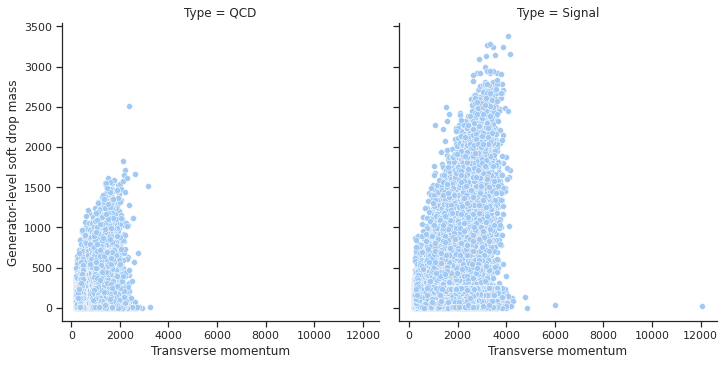

In [25]:
# Sketch scatterplot

scatterplot = pt_mass_relationship(df_pt)

> Though it's not the most robust relationship, transverse momentum of both types of jets retain positive relationship with their jet mass. In general, jets with higher transverse momentum tend to have higher mass, but there are those with high transverse momentum that are highly light close to mass of 0 as well.